In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df1 = pd.read_csv("csv/machinelearning.csv",encoding="utf-8")
# df2 = pd.read_csv("csv/datascience.csv",encoding="utf-8")
df3 = pd.read_csv("csv/datascience2.csv",encoding="utf-8")
df4 = pd.read_csv("csv/data_analyst.csv",encoding="utf-8")
df5 = pd.read_csv("csv/ai.csv",encoding="utf-8")

df = pd.concat([df1,df2,df3,df4,df5], axis=0).drop_duplicates()
df.shape

(1400, 6)

In [17]:
df["Sponsored"].value_counts()

Organic      1217
Sponsored     183
Name: Sponsored, dtype: int64

In [5]:
df = df[df.Sponsored != 'Sponsored']
df.shape

(1217, 6)

D:\Nilesh\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


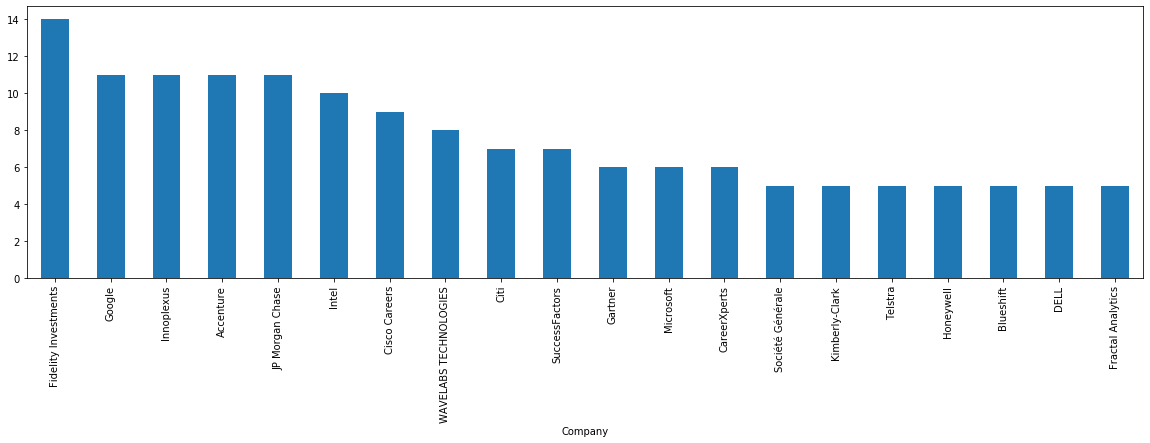

In [6]:
##Task 1: Find companies with highest number of job listings
counts = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
counts.plot("bar",figsize=(20,5))

Location
Bengaluru, Karnataka    374
Pune, Maharashtra       201
Mumbai, Maharashtra      93
Hyderabad, Telangana     93
Gurgaon, Haryana         60
Delhi, Delhi             43
India                    41
Chennai, Tamil Nadu      39
Noida, Uttar Pradesh     36
Ahmedabad, Gujarat       21
Name: Title, dtype: int64


D:\Nilesh\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.


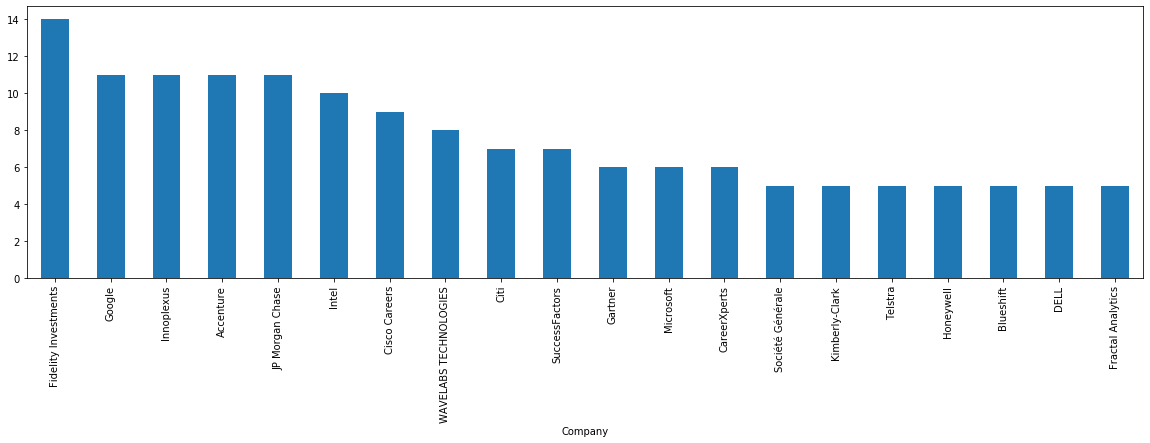

In [7]:
##Task 2: Find Locations with highest number of job listings
loc_counts = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:10]
print(loc_counts)
counts.plot("bar",figsize=(20,5))

In [9]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("₹","").replace("a month","").replace("a year","").replace(",","")
    row["salary_max"] = salary_max.replace("₹","").replace("a month","").replace("a year","").replace(",","")
       
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
    
   
    return row


df_salary = df[df["Salary"]!= "None"].dropna()
df_salary = df_salary.apply(format_salary,axis=1) 

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"],'coerce')
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"],'coerce')

print(df_salary["salary_min"].mean())
print(df_salary["salary_max"].mean())

253597.5625
421614.21989528794


In [11]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [12]:
import nltk
from nltk import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tags_df = df["Description"].apply(cleanData)

In [13]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

In [14]:
#skills = ["tableau","power","qlik"]
#skills = ["aws","azure"]
#skills = ["nltk","pandas","numpy","matplotlib","jupyter","opencv"]
skills = ["statistics","machine","deep","neural","predictive"]
# skills = ["experienced","expert","intern","intermediate","begineer","fresher"]

D:\Nilesh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  


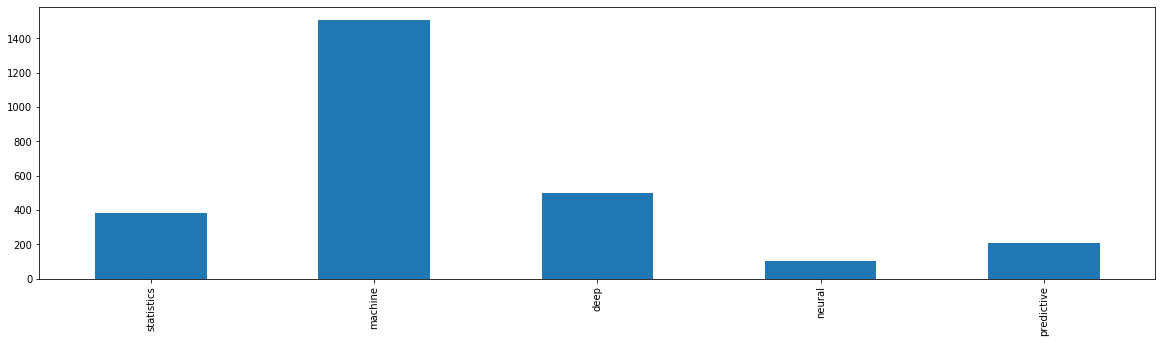

In [15]:
filter_series = result_series.filter(items=skills)
filter_series.plot('bar',figsize=(20,5))